In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings

In [2]:
def get_robust_mean_rms(input_arr, sigma_threshold):
    arr = np.copy(input_arr)
    ok = False
    iter_i, rms, mean = 0, 0.0, 0.0
    while not ok:
        iter_i += 1
        threshold = rms * sigma_threshold

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            mean = np.nanmean(arr)
        rms0 = rms

        if iter_i > 1:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning)
                arr[abs(arr - mean) > threshold] = np.nan
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            rms = np.nanstd(arr)

        if iter_i > 1:
            if rms == 0.0:
                ok = True  # return
            elif np.isnan(rms):
                ok = True
            elif abs((rms0 / rms) - 1.0) < 0.01:
                ok = True
        print(f"mean={mean} ----> rms={rms}")
    return mean, rms

In [3]:
def remove_rfi(dynamic_spectrum, sigma_threshold=3):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean, rms = np.nanmean(dynamic_spectrum, axis=0), np.nanstd(dynamic_spectrum, axis=0)
    
    # option for robust mean/rms
    snr = 0.5 #float(np.sqrt(1))
    efficiency_x = mean / rms * snr
    
    mean_x, std_x = get_robust_mean_rms(efficiency_x, sigma_threshold)
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        flagged_ds = np.where(abs(mean_x - efficiency_x) > sigma_threshold * std_x, np.nan, dynamic_spectrum)

    return flagged_ds

In [41]:
effData = np.loadtxt("DynSpec.dat", delimiter=' ').T
effData.shape

(1024, 1784)

In [44]:
1784/2

892.0

In [58]:
temp1 = simulatedNoisyDS[:, 0::4]
temp2 = simulatedNoisyDS[:, 1::4]
DynSpec = np.hstack((temp1,temp2))
for i in range(temp1.shape[1]):
    DynSpec[:,2*i]   = temp1[:,i]
    DynSpec[:,2*i+1] = temp2[:,i]

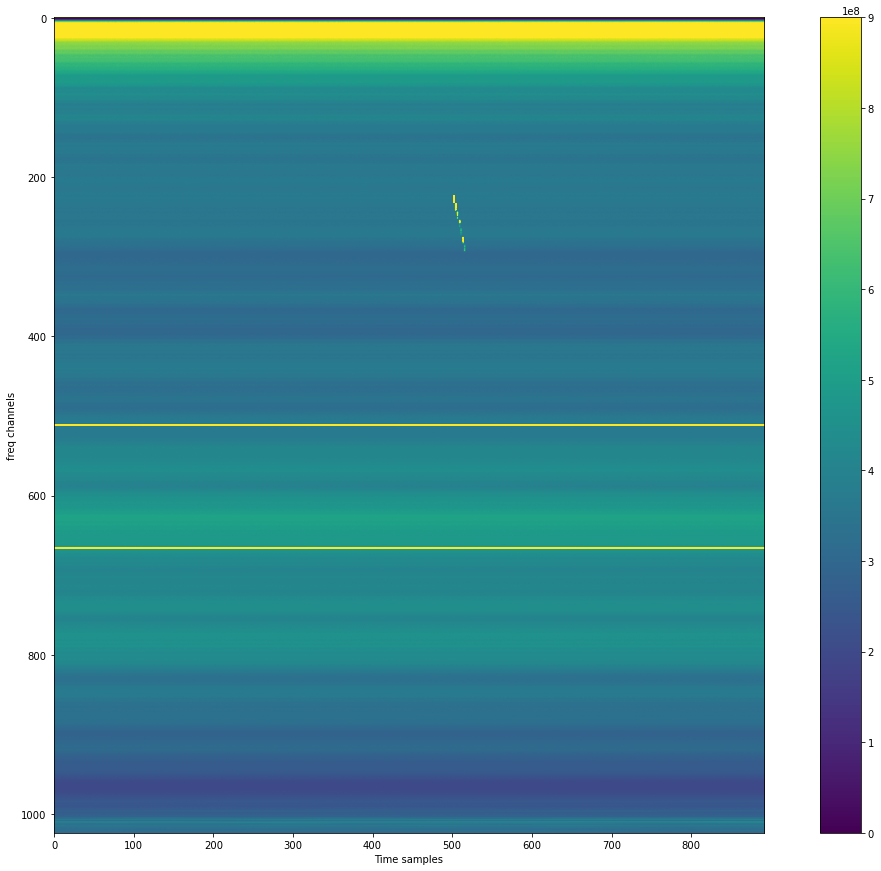

In [63]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.imshow(DynSpec, vmin=0, vmax=900000000)
plt.colorbar()
plt.ylabel("freq channels")
plt.xlabel("Time samples")
plt.show()

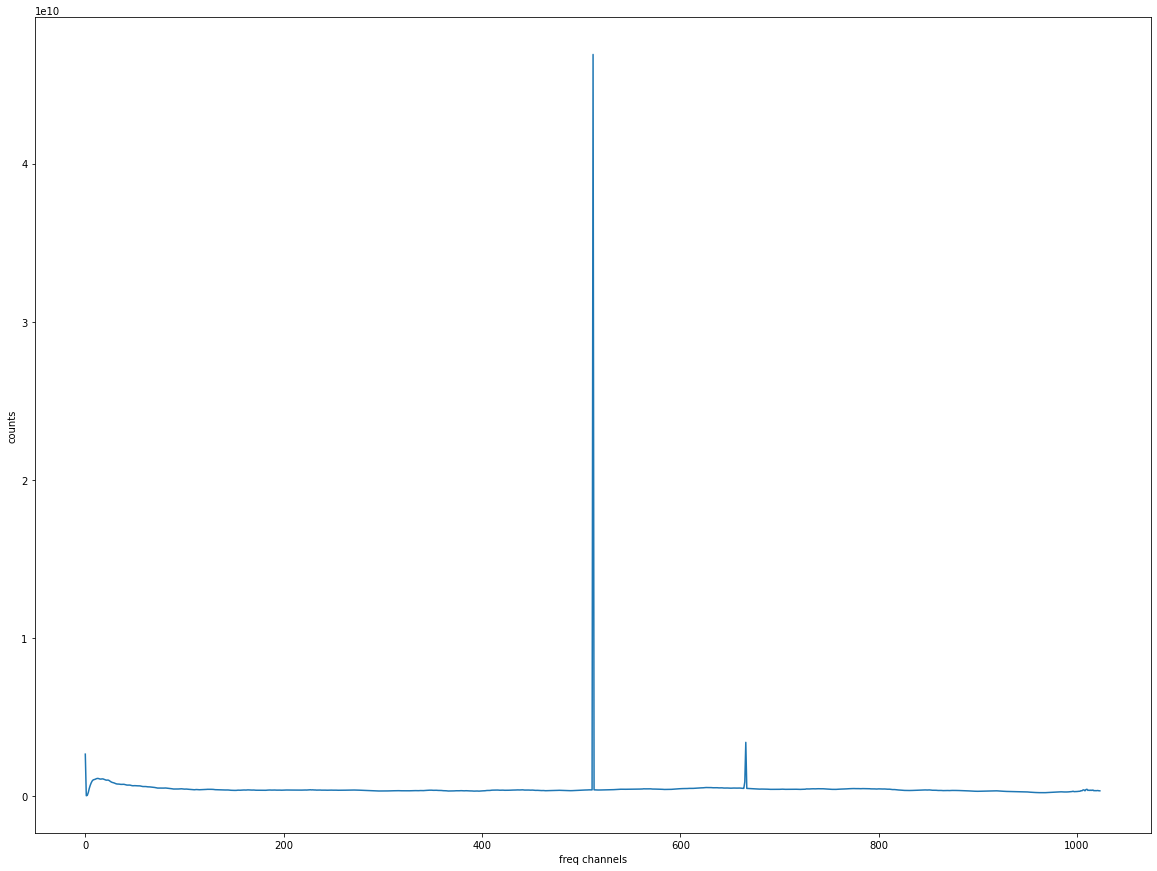

In [65]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(np.nanmean(DynSpec, axis=1))
plt.xlabel("freq channels")
plt.ylabel("counts")
plt.show()

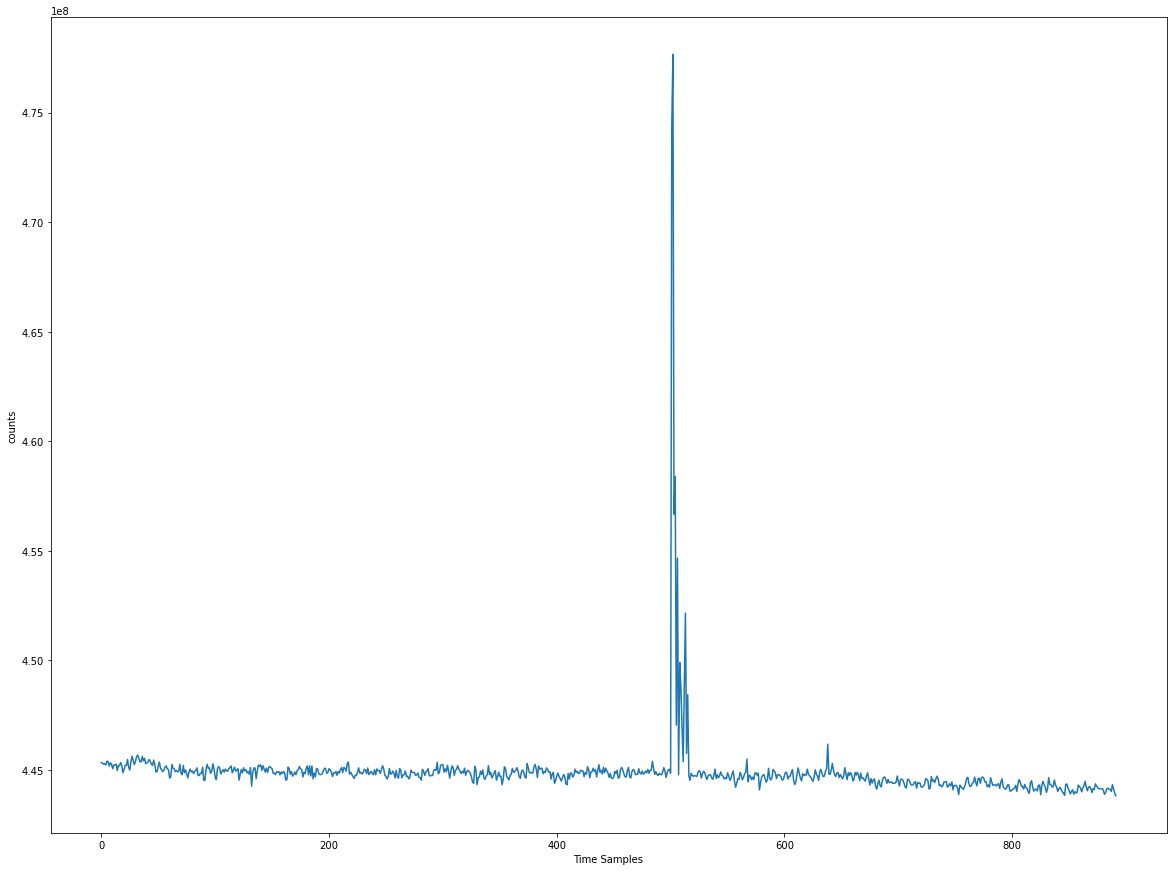

In [67]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(np.nanmean(DynSpec, axis=0))
plt.xlabel("Time Samples")
plt.ylabel("counts")
plt.show()

In [72]:
flagged_ds = remove_rfi(DynSpec.T).T

mean=97.25124633224954 ----> rms=26.984272760907853
mean=97.25124633224954 ----> rms=17.414940310551245
mean=101.92658197454202 ----> rms=11.634051464940148
mean=104.28726585710413 ----> rms=10.323932804371818
mean=104.98581827232238 ----> rms=9.990302267405717
mean=105.20561835215976 ----> rms=9.897096928117412


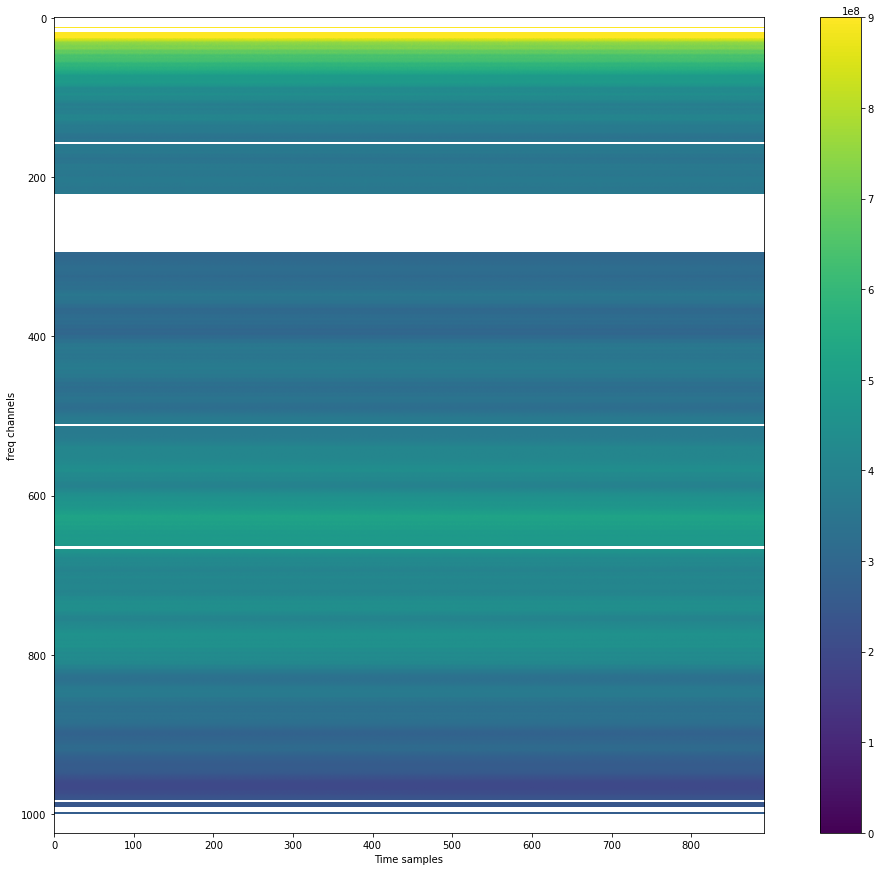

In [73]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.imshow(flagged_ds, vmin=0, vmax=900000000)
plt.colorbar()
plt.ylabel("freq channels")
plt.xlabel("Time samples")
plt.show()

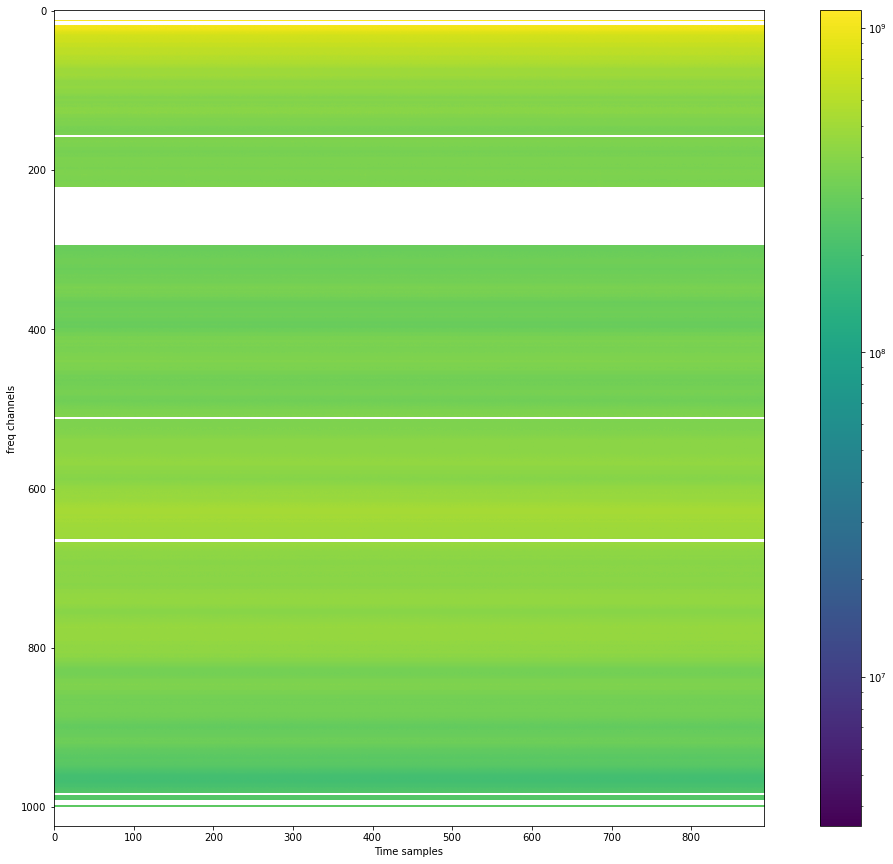

In [80]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.imshow(flagged_ds, norm=colors.LogNorm())
plt.colorbar()
plt.ylabel("freq channels")
plt.xlabel("Time samples")
plt.show()

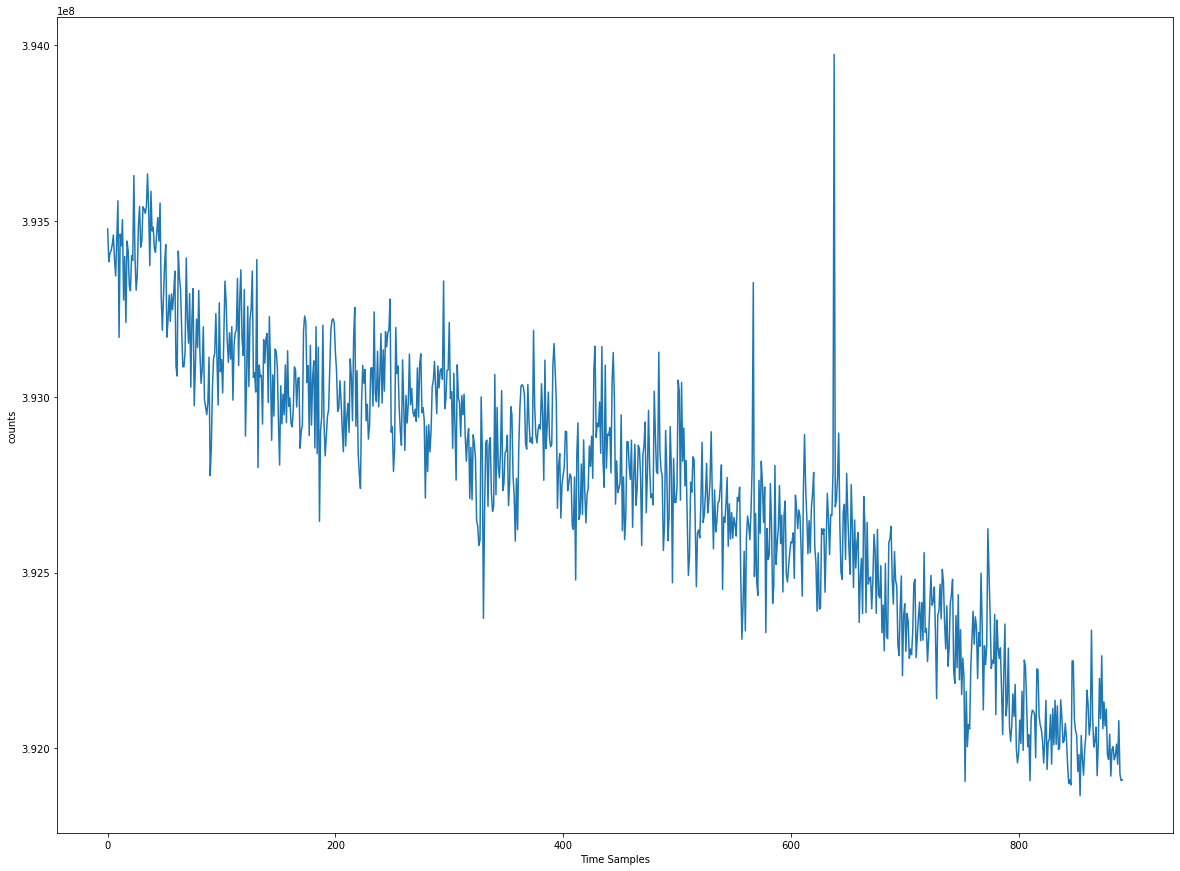

In [75]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(np.nanmean(flagged_ds, axis=0))
plt.xlabel("Time Samples")
plt.ylabel("counts")
plt.show()

/var/folders/4_/m1t66l950s95r0dym5720jtm0000gn/T/ipykernel_21151/2500167924.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(flagged_ds, axis=1))


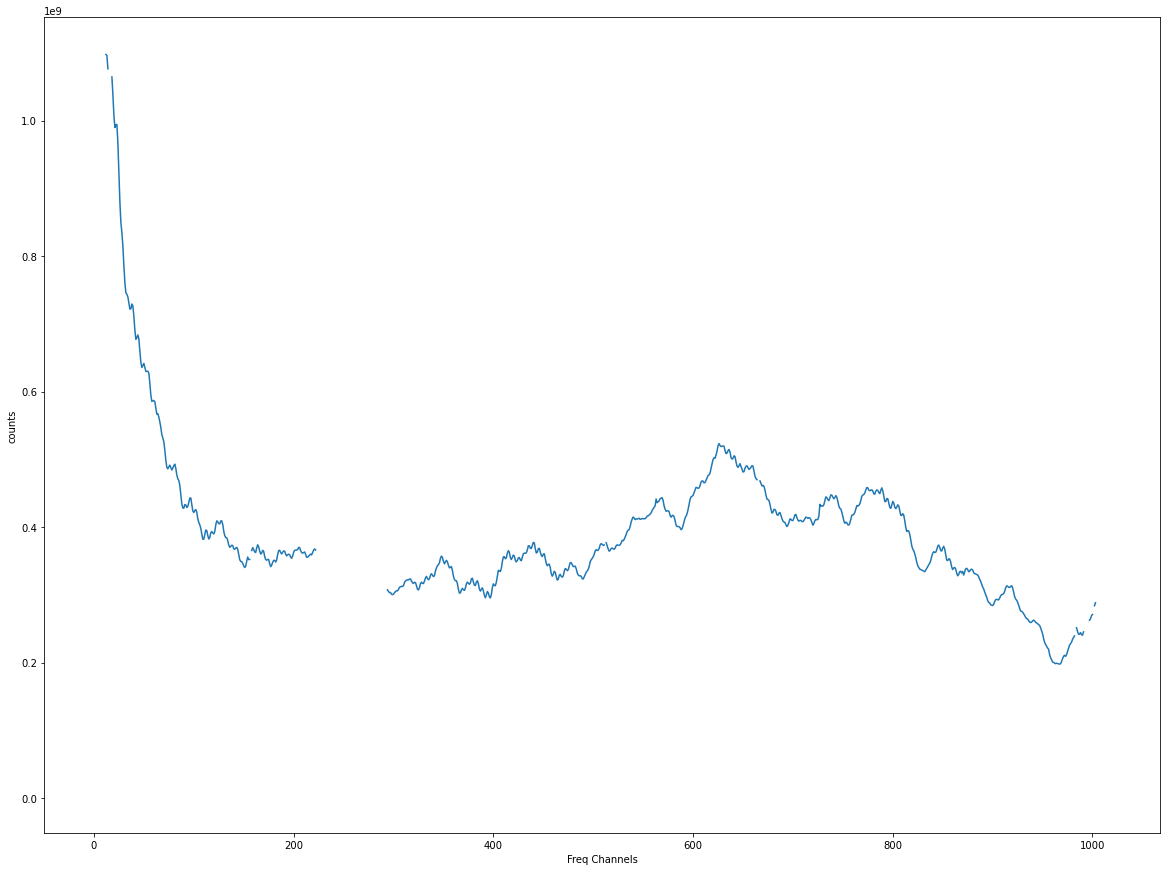

In [76]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(np.nanmean(flagged_ds, axis=1))
plt.xlabel("Freq Channels")
plt.ylabel("counts")
plt.show()